TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python

Objective: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and
display it using basic print statements and a simple bar chart

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# STEP 1: Connect to SQLite Database (it will create if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [15]:
# STEP 2: Create Sales Table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

In [16]:
# STEP 3: Insert Fake Sales Data (Only run once; comment after first run)
sample_data = [
    ("Pen", 10, 5.0),
    ("Notebook", 5, 20.0),
    ("Pencil", 15, 2.0),
    ("Pen", 8, 5.0),
    ("Notebook", 3, 20.0),
    ("Pencil", 10, 2.0),
    ("Marker", 4, 15.0),
    ("Pen", 12, 5.0),
    ("Notebook", 6, 20.0),
    ("Pencil", 18, 2.0),
    ("Pen", 7, 5.0),
    ("Notebook", 2, 20.0),
    ("Pencil", 20, 2.0),
    ("Pen", 9, 5.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [17]:

# STEP 4: Run SQL Query for Sales Summary
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [18]:
# STEP 5: Print the Result
print("=== Basic Sales Summary ===")
print(df)


=== Basic Sales Summary ===
    product  total_qty  revenue
0    Marker         12    180.0
1  Notebook         32    640.0
2       Pen         82    410.0
3    Pencil        113    226.0


<Figure size 800x500 with 0 Axes>

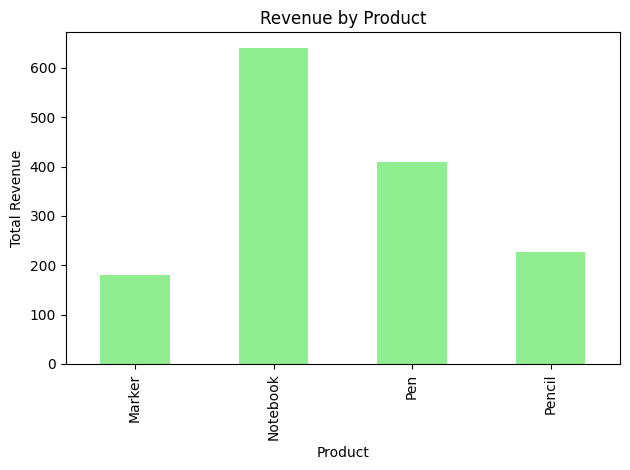

In [19]:
# STEP 6: Create a Bar Chart for Revenue
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', color='lightgreen', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save image
plt.show()


In [20]:
# STEP 7: Close the Database Connection
conn.close()
